In [255]:
# Імротуємо біблиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


# Завантажуємо датасет
housing = fetch_california_housing(as_frame=True)

In [121]:
# Інформація про датасет 

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [122]:
housing.frame.info() #no exist missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [123]:
housing.target.info() #no exist missing value

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [124]:
# Створюємо датафрейм 

df = pd.DataFrame(data = np.c_[housing['data'], housing['target']],
                 columns= housing.feature_names + ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<AxesSubplot:>

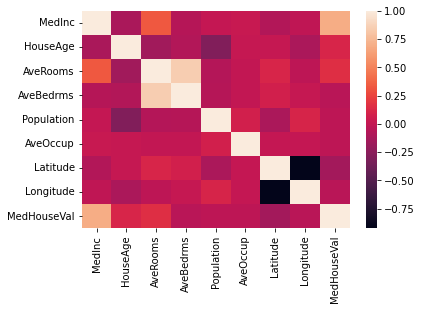

In [139]:
import seaborn as sns
sns.heatmap(housing.frame.corr()) #корелюють 'Latitude','Longitude' та 'AveRooms','AveBedrms'

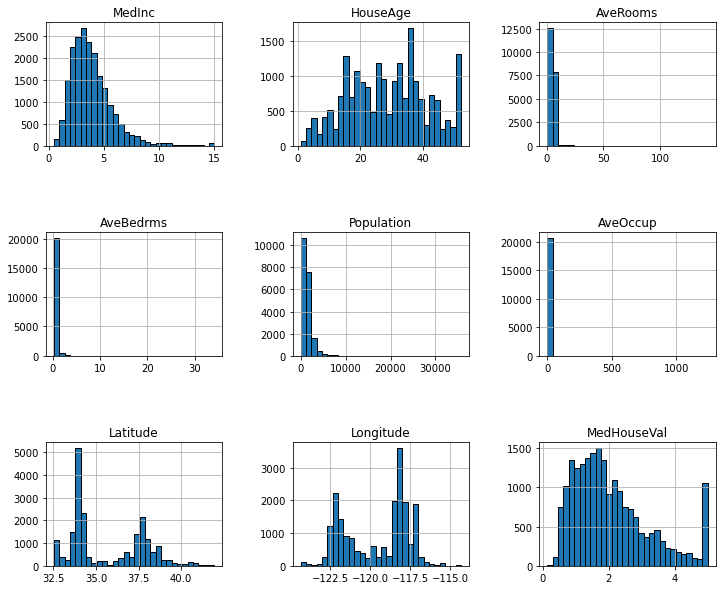

In [140]:
housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4) #'AveBedrms', 'AveOccup' не вистачає різноманітності у данних

In [269]:
x = df[['MedInc','HouseAge','AveRooms','Population','Latitude']]#,'AveBedrms', 'AveOccup','Longitude']]#,'basket'
y = df['target']

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

In [271]:
#маштабування признаків
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)

mean,std

(MedInc           3.863645
 HouseAge        28.710574
 AveRooms         5.428986
 Population    1417.285489
 Latitude        35.628200
 dtype: float64,
 MedInc           1.899112
 HouseAge        12.582514
 AveRooms         2.407485
 Population    1102.712725
 Latitude         2.136534
 dtype: float64)

In [247]:
x_train-=mean
x_train/=std

x_test-=mean
x_test/=std

In [248]:
x_train.mean(axis=0)

MedInc       -1.123911e-14
HouseAge      3.115779e-17
AveRooms     -7.855463e-15
Population    1.700432e-17
Latitude      1.993858e-14
dtype: float64

In [249]:
x_train.std(axis=0)

MedInc        1.0
HouseAge      1.0
AveRooms      1.0
Population    1.0
Latitude      1.0
dtype: float64

In [210]:
#Ridge
alphas=list(np.logspace(-7,4,10))
models=[]
coefs=[]

alphas

[1e-07,
 1.6681005372000591e-06,
 2.782559402207126e-05,
 0.0004641588833612782,
 0.007742636826811277,
 0.12915496650148853,
 2.1544346900318865,
 35.9381366380464,
 599.4842503189421,
 10000.0]

In [211]:
for alpha in alphas:
    m_r=Ridge(alpha=alpha).fit(x_train,y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(x_train, y_train))


In [212]:
len(models)

11

In [213]:
len(coefs)

10

In [214]:
coefs[0].shape

(5,)

In [215]:
#метрики
import pandas as pd

scores=pd.DataFrame()
scores=scores.append(
    {
        'alpha': 'no',
        'train_r2':r2_score(y_train, models[-1].predict(x_train)),
        'test_r2':r2_score(y_test, models[-1].predict(x_test)),
        'train_MAE':mean_absolute_error(y_train, models[-1].predict(x_train)), 
        'test_MAE':mean_absolute_error(y_test, models[-1].predict(x_test)), 
        'train_MSE':mean_squared_error(y_train, models[-1].predict(x_train)),
        'test_MSE':mean_squared_error(y_test, models[-1].predict(x_test))
    }, ignore_index=True
    )

for i,m in enumerate (models[:-1]):
    alpha=alphas[i]
    scores=scores.append(
        {
            'alpha': alpha,
            'train_r2':r2_score(y_train, m.predict(x_train)),
            'test_r2':r2_score(y_test, m.predict(x_test)),
            'train_MAE':mean_absolute_error(y_train, m.predict(x_train)),
            'test_MAE':mean_absolute_error(y_test, m.predict(x_test)), 
            'train_MSE':mean_squared_error(y_train, m.predict(x_train)),
            'test_MSE':mean_squared_error(y_test, m.predict(x_test))
        }, ignore_index=True
    )
    
scores

C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1472030878.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1472030878.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1472030878.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1472030878.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19

,alpha,train_r2,test_r2,train_MAE,test_MAE,train_MSE,test_MSE
0,no,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
1,0.0,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
2,0.000002,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
3,0.000028,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
4,0.000464,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
5,0.007743,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
6,0.129155,0.521948,0.508092,0.593106,0.603187,0.635107,0.660792
7,2.154435,0.521948,0.508094,0.593114,0.603193,0.635107,0.660789
8,35.938137,0.521945,0.508119,0.593248,0.603305,0.635111,0.660755
9,599.48425,0.521146,0.507809,0.595927,0.605705,0.636172,0.661171


In [216]:
#best metris Ridge
scores.sort_values(['test_r2','train_r2'],ascending=False)

,alpha,train_r2,test_r2,train_MAE,test_MAE,train_MSE,test_MSE
8,35.938137,0.521945,0.508119,0.593248,0.603305,0.635111,0.660755
7,2.154435,0.521948,0.508094,0.593114,0.603193,0.635107,0.660789
6,0.129155,0.521948,0.508092,0.593106,0.603187,0.635107,0.660792
5,0.007743,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
4,0.000464,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
3,0.000028,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
2,0.000002,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
1,0.0,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
0,no,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792
9,599.48425,0.521146,0.507809,0.595927,0.605705,0.636172,0.661171


In [218]:
#Lasso
alphas=list(np.logspace(-7,4,10))
models=[]
coefs=[]

alphas

[1e-07,
 1.6681005372000591e-06,
 2.782559402207126e-05,
 0.0004641588833612782,
 0.007742636826811277,
 0.12915496650148853,
 2.1544346900318865,
 35.9381366380464,
 599.4842503189421,
 10000.0]

In [219]:
for alpha in alphas:
    m_r=Lasso(alpha=alpha).fit(x_train,y_train) #Lasso
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(x_train, y_train))

In [220]:
#метрики
import pandas as pd

scores=pd.DataFrame()
scores=scores.append (
    {
        'alpha': 'no',
        'train_r2':r2_score(y_train, models[-1].predict(x_train)),
        'test_r2':r2_score(y_test, models[-1].predict(x_test)),
        'train_MAE':mean_absolute_error(y_train, models[-1].predict(x_train)), 
        'test_MAE':mean_absolute_error(y_test, models[-1].predict(x_test)), 
        'train_MSE':mean_squared_error(y_train, models[-1].predict(x_train)),
        'test_MSE':mean_squared_error(y_test, models[-1].predict(x_test)),
        'train_RMSE':np.sqrt(mean_squared_error(y_train, models[-1].predict(x_train))),
        'test_RMSE':np.sqrt(mean_squared_error(y_test, models[-1].predict(x_test))),
        
    }, ignore_index=True
    )

for i,m in enumerate (models[:-1]):
    alpha=alphas[i]
    scores=scores.append(
        {
            'alpha': alpha,
            'train_r2':r2_score(y_train, m.predict(x_train)),
            'test_r2':r2_score(y_test, m.predict(x_test)),
            'train_MAE':mean_absolute_error(y_train, m.predict(x_train)),
            'test_MAE':mean_absolute_error(y_test, m.predict(x_test)), 
            'train_MSE':mean_squared_error(y_train, m.predict(x_train)),
            'test_MSE':mean_squared_error(y_test, m.predict(x_test)),
            'train_RMSE':np.sqrt(mean_squared_error(y_train, m.predict(x_train))),
            'test_RMSE':np.sqrt(mean_squared_error(y_test, m.predict(x_test))),
        }, ignore_index=True
    )

scores

C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1785095176.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append (
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1785095176.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1785095176.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_19104\1785095176.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append(
C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_1

,alpha,train_r2,test_r2,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE
0,no,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
1,0.0,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
2,0.000002,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
3,0.000028,0.521948,0.508092,0.593108,0.603188,0.635107,0.660792,0.796936,0.812891
4,0.000464,0.521947,0.508091,0.593137,0.603217,0.635108,0.660792,0.796937,0.812891
5,0.007743,0.521684,0.507868,0.593821,0.603910,0.635457,0.661093,0.797156,0.813076
6,0.129155,0.483497,0.472134,0.627662,0.637118,0.686190,0.709095,0.828366,0.842078
7,2.154435,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183
8,35.938137,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183
9,599.48425,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183


In [221]:
#best metris Lasso
scores.sort_values(['test_r2','train_r2'],ascending=False) 
#alpha=0.000028

,alpha,train_r2,test_r2,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE
3,0.000028,0.521948,0.508092,0.593108,0.603188,0.635107,0.660792,0.796936,0.812891
1,0.0,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
0,no,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
2,0.000002,0.521948,0.508092,0.593106,0.603186,0.635107,0.660792,0.796936,0.812891
4,0.000464,0.521947,0.508091,0.593137,0.603217,0.635108,0.660792,0.796937,0.812891
5,0.007743,0.521684,0.507868,0.593821,0.603910,0.635457,0.661093,0.797156,0.813076
6,0.129155,0.483497,0.472134,0.627662,0.637118,0.686190,0.709095,0.828366,0.842078
7,2.154435,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183
8,35.938137,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183
9,599.48425,0.000000,-0.000285,0.911061,0.910627,1.328531,1.343705,1.152619,1.159183


Basic version без маштабування

In [226]:
lr = Lasso() # Initializing the model
lr.fit(x_train, y_train) # Fitting the model to the training data
y_pred = lr.predict(x_test) # Predicting prices on the testing set
score = r2_score(y_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_test, y_pred) 
score_3 = mean_squared_error(y_test, y_pred)
score_4 = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing MAE score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.287

Model MAE Score: 0.759

Model MSE Score: 0.927

Model RMSE Score: 0.963


In [227]:
lr = Ridge(alpha=20) # Initializing the model
lr.fit(x_train, y_train) # Fitting the model to the training data

y_pred = lr.predict(x_test) # Predicting prices on the testing set
score = r2_score(y_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_test, y_pred) 
score_3 = mean_squared_error(y_test, y_pred)

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing R² score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.521

Model MAE Score: 0.590

Model MSE Score: 0.623

Model RMSE Score: 0.963


Валідація

In [272]:
#розп на train, val
X_train, X_val_train, Y_train, y_val_train = train_test_split(x_train, y_train, 
                                                    test_size=0.2, 
                                                    shuffle=True)

In [292]:
lr = Lasso(alpha=0.000001) # Initializing the model
lr.fit(X_train, Y_train) # Fitting the model to the training data

y_pred = lr.predict(X_val_train) # Predicting prices on the testing set
score = r2_score(y_val_train, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_val_train, y_pred) 
score_3 = mean_squared_error(y_val_train, y_pred)
score_4 = np.sqrt(mean_squared_error(y_val_train, y_pred))

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing MAE score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.503

Model MAE Score: 0.602

Model MSE Score: 0.643

Model RMSE Score: 0.802


In [280]:
lr = Ridge(alpha=0.000001) # Initializing the model
lr.fit(X_train, Y_train) # Fitting the model to the training data

y_pred = lr.predict(X_val_train) # Predicting prices on the testing set
score = r2_score(y_val_train, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_val_train, y_pred) 
score_3 = mean_squared_error(y_val_train, y_pred)
score_4 = np.sqrt(mean_squared_error(y_val_train, y_pred))

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing R² score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.503

Model MAE Score: 0.602

Model MSE Score: 0.643

Model RMSE Score: 0.802


In [276]:
#розп на test, val
X_test, X_val_test, Y_test, y_val_test = train_test_split(x_test, y_test, 
                                                    test_size=0.2, 
                                                    shuffle=True)

In [289]:
lr = Ridge(alpha=0.0001) # Initializing the model
lr.fit(X_test, Y_test) # Fitting the model to the training data

y_pred = lr.predict(X_val_test) # Predicting prices on the testing set
score = r2_score(y_val_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_val_test, y_pred) 
score_3 = mean_squared_error(y_val_test, y_pred)
score_4 = np.sqrt(mean_squared_error(y_val_test, y_pred))

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing R² score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.367

Model MAE Score: 0.577

Model MSE Score: 0.836

Model RMSE Score: 0.914


In [294]:
lr = Lasso(alpha=0.001) # Initializing the model
lr.fit(X_test, Y_test) # Fitting the model to the training data

y_pred = lr.predict(X_val_test) # Predicting prices on the testing set
score = r2_score(y_val_test, y_pred) # Measuring Model performance by comparing the predicted values to the actual values
score_2 = mean_absolute_error(y_val_test, y_pred) 
score_3 = mean_squared_error(y_val_test, y_pred)
score_4 = np.sqrt(mean_squared_error(y_val_test, y_pred))

print(f'\nModel R² Score: {score:.3f}') # Printing R² score
print(f'\nModel MAE Score: {score_2:.3f}') # Printing MAE score
print(f'\nModel MSE Score: {score_3:.3f}') # Printing MSE score
print(f'\nModel RMSE Score: {score_4:.3f}') # Printing RMSE score


Model R² Score: 0.370

Model MAE Score: 0.577

Model MSE Score: 0.832

Model RMSE Score: 0.912
